In [17]:
#Analisando Ações com Python usando Yahoo Finance
#1.0.0 Estas são as bibliotecas necessárias para a análise dos dados que vamos usar.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#1.0.1 - Essas são as bibliotecas para analisar os dados obtidos na Web do site Yahoo Finance. 
#Essa faz a varredura dos dados
import pandas_datareader.data as web
#Essa se conecta ao portal yfinance.
import yfinance as yf
#1.0.2 - Essa é a biblioteca para analisar os fundamentos das empresas selecionadas
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.
yf.pdr_override()
#2.0 - O comando web.get_data_yahoo nos permite obter os dados da Bovespa através de sua sigla. 
ibov = web.get_data_yahoo('^BVSP')
#2.0.1 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
pnad = consulta_bc(24369)
cdi = consulta_bc(12)

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'BVSP')

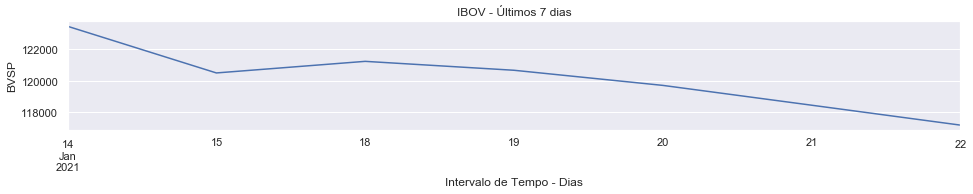

In [18]:
#2.1 - E podemos testar os últimos e os primeiros dados dentro do banco de dados
#2.1.1 - A cauda do IBOV(Os dados mais recentes)
ibov.tail(7)
# E aqui podemos ter acesso aos dados mais recentes do Ibov de forma gráfica, e no mesmo sentido podemos pegar qualquer intervalo de tempo maior ou menor que 5.
ibov.tail(7)["Close"].plot(figsize=(16,2))
plt.title("IBOV - Últimos 7 dias")
plt.xlabel("Intervalo de Tempo - Dias")
plt.ylabel("BVSP")

Text(0, 0.5, 'BVSP')

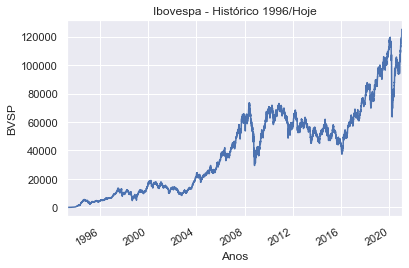

In [19]:
#Ibovespa Completo
ibov["Close"].plot()
plt.title("Ibovespa - Histórico 1996/Hoje")
plt.xlabel("Anos")
plt.ylabel("BVSP")

Text(0, 0.5, 'Inflação (%)')

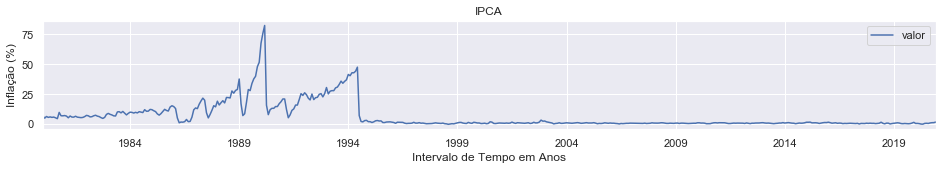

In [20]:
#Taxa IPCA desde sempre
ipca.plot(figsize=(16,2))
plt.title("IPCA")
plt.xlabel("Intervalo de Tempo em Anos")
plt.ylabel("Inflação (%)")

Text(0, 0.5, 'CDI (%)')

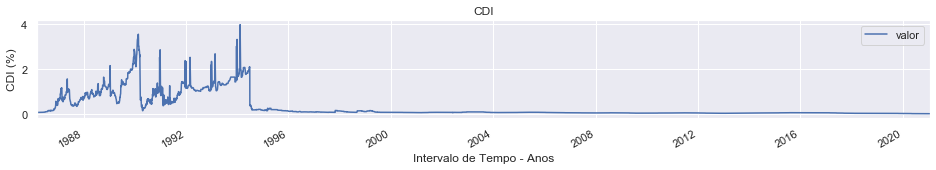

In [21]:
#Taxa CDI
cdi.plot(figsize=(16,2))
plt.title("CDI")
plt.xlabel("Intervalo de Tempo - Anos")
plt.ylabel("CDI (%)")

Text(0, 0.5, 'IGPM (%)')

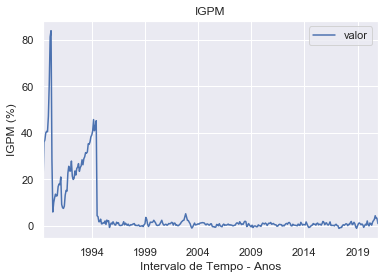

In [24]:
#Taxa IGPM
igpm.plot()
plt.title("IGPM")
plt.xlabel("Intervalo de Tempo - Anos")
plt.ylabel("IGPM (%)")

Text(0, 0.5, 'Taxa SELIC (%)')

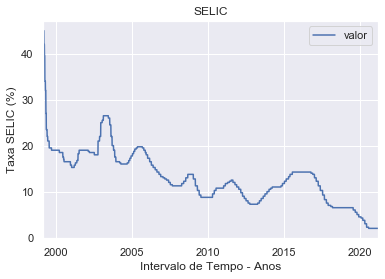

In [25]:
#Taxa SELIC - Valor esperado pelo BACEN
selic_meta.plot()
plt.title("SELIC")
plt.xlabel("Intervalo de Tempo - Anos")
plt.ylabel("Taxa SELIC (%)")

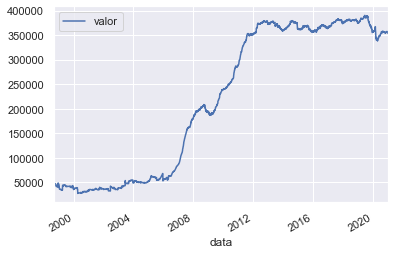

In [26]:
#Reservas Internacionais
reservas_internacionais.plot()

In [27]:
#Pesquisa Nacional por Amostra de Domicílios - PNAD | IBGE
pnad

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2020-06-01,13.3
2020-07-01,13.8
2020-08-01,14.4


In [5]:
#Aqui estipulamos uma data de início para calcular o retorno sobre o ibovespa a partir da coluna "Fechamento Ajustado"
data_inicio = '2000-01-01'

ibovretorno = yf.download(tickers='^BVSP')[['Adj Close']]
ibov_retorno = ibovretorno.pct_change()

#
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1


cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

ipca_acumulado = (1 + ipca[ipca.index >= data_inicio] / 100).cumprod()
ipca_acumulado.iloc[0] = 1


[*********************100%***********************]  1 of 1 completed


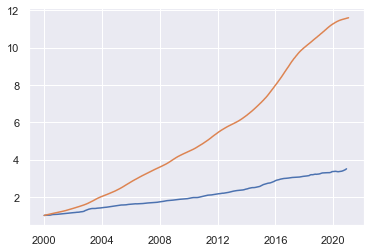

In [16]:
#CDI vs. IPCA
fig, ax = plt.subplots()
ax.plot(ipca_acumulado)
ax.plot(cdi_acumulado)


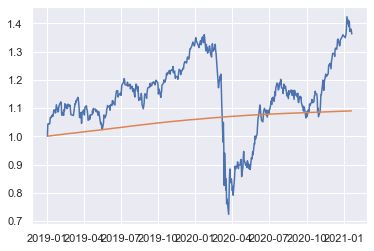

In [41]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);

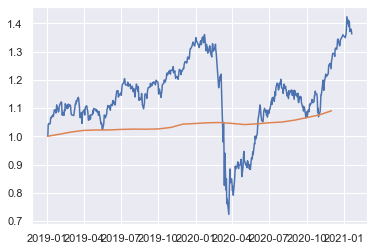

In [42]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(ipca_acumulado);

Date
2021-01-11   -1.813312
2021-01-12    0.602815
2021-01-13   -1.577470
2021-01-14    1.257924
2021-01-15   -2.405404
2021-01-18    0.740335
2021-01-19   -0.475876
2021-01-20   -0.776659
2021-01-21   -0.990571
2021-01-22   -0.968576
dtype: float64

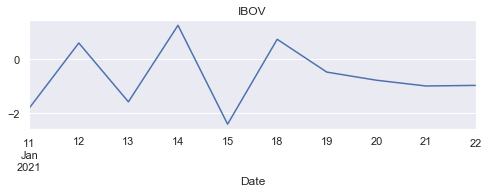

In [28]:
#2.1.2 - Podemos também usar a função lambda para plotar variações pontuais dentro do intervalo desejado
pct_ibov = (ibov.Close/ibov.Open).apply(lambda x:x-1)*100
display(pct_ibov.tail(10))
#Por exemplo, observar graficamente os últimos 10 dias de variação do IBOV
pct_ibov.tail(10).plot(figsize=(8,2),title = 'IBOV')

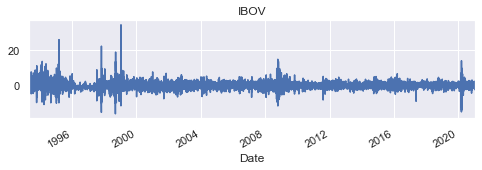

In [8]:
#Observe todo o histórico de oscilações pontuais do IBOV ao longo do tempo, é um gráfico com formato bem interessante.
#É interessante notar os anos com maior oscilação são os que possuem grandes quedas e grandes subidas.
pct_ibov.plot(figsize=(8,2),title = 'IBOV')

In [9]:
#2.1.2 - A cabeça do IBOV (os dados mais antigos)
ibov.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


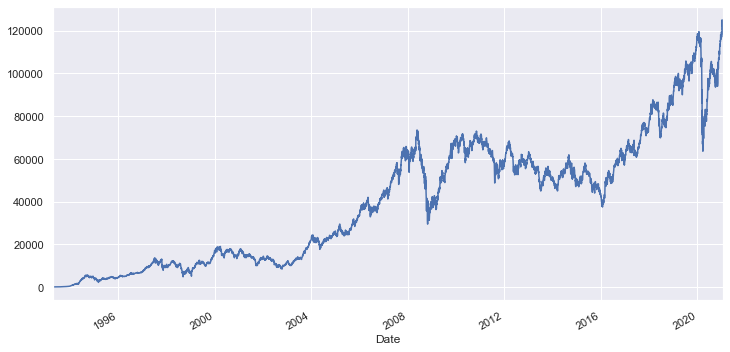

In [10]:
#E usando o comando plot e figsize, criamos um gráfico do fechamento do IBOV desde seu início em ~1995.
ibov["Close"].plot(figsize=(12,6))

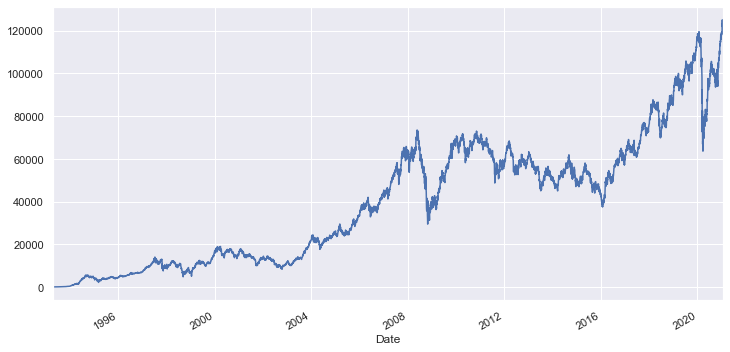

In [11]:
#Assim como é possível criarmos um gráfico de sua abertura todos os dias desde ~1995.
ibov["Open"].plot(figsize=(12,6))

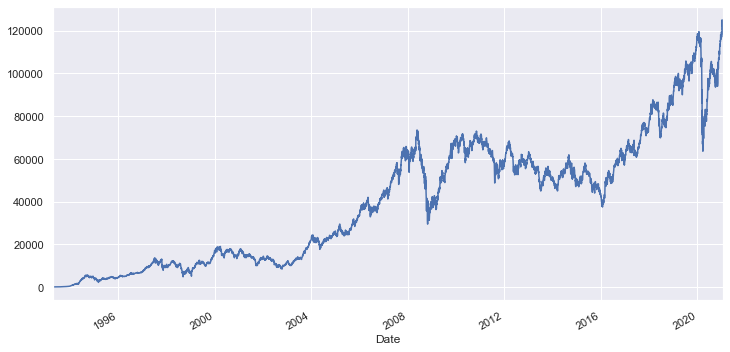

In [12]:
#E o fechamento ajustado
ibov["Adj Close"].plot(figsize=(12,6))

[*********************100%***********************]  1 of 1 completed


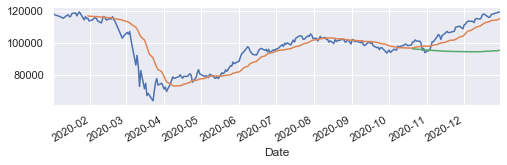

In [46]:
#Podemos fatiar uma parte específica do ibovespa
ibovparcial = web.get_data_yahoo('^BVSP', start = '2020-01-01', end='2020-12-31')
ibovparcial["Close"].plot(figsize=(8,2))
ibovparcial["Close"].rolling(21).mean().plot(label="MM21")
ibovparcial["Close"].rolling(200).mean().plot(label="MM200")
ibovparcial["Close"].rolling(365).mean().plot(label="MM365")

In [ ]:
#Vídeo 2 - Definindo intervalos,
# calculando e plotando médias móveis
ibov["Close"].plot(figsize=(8,2), label="IBOV")
#O Comando rolling é usado para calcular a média móvel de X dias
ibov["Close"].plot(figsize=(8,2), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
ibov["Adj Close"].rolling(365).mean().plot(label="MM365")

In [ ]:
#Parcelas menores do IBOV, por exemplo entre 2008 e 2015
ibov_fatiado = ibov[(ibov.index.year >= 2019) & (ibov.index.year <=2020)] 
# Médias móveis relacionadas a parte que separei do IBOV. Posso analisar a média móvel entre 2019-2020. 
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
ibov_fatiado["Close"].rolling(365).mean().plot(label="MM365")
ibov_fatiado["Close"].plot(figsize=(8,2), label="IBOV20192020")

In [ ]:
#Podemos utilizar essa mesma técnica para verificar o IBOV em diferentes governos.
# Por exemplo, o IBOV durante o governo FHC
ibovFHC = ibov[(ibov.index.year >= 1995) & (ibov.index.year <= 2003)]
ibovFHC ["Adj Close"].plot(figsize=(8,2))
#E agora os dois mandatos do Governo Lula
ibovLula = ibov[(ibov.index.year >= 2003) & (ibov.index.year <=2010)]
ibovLula ["Adj Close"].plot(figsize=(8,2))
#O Primeiro mandato do Governo Dilma
ibovDilma1 = ibov[(ibov.index.year >=2010) & (ibov.index.year <= 2014)]
ibovDilma1 ["Adj Close"].plot(figsize=(8,2))
# O Segundo mandato até o Impeachment
ibovDilma2 = ibov[(ibov.index.year>=2014)&(ibov.index.year <= 2016)]
ibovDilma2 ["Adj Close"].plot(figsize=(8,2))
#Governo Temer 
ibovTemer = ibov[(ibov.index.year>=2016)&(ibov.index.year <= 2018)]
ibovTemer ["Adj Close"].plot(figsize=(8,2))
#Governo Bolsonaro
ibovBolsonaro = ibov[(ibov.index.year >=2018)]
ibovBolsonaro ["Adj Close"].plot(figsize=(8,2))

In [ ]:
# Por exemplo, o IBOV durante o governo FHC
ibovFHC = ibov[(ibov.index.year >= 1995) & (ibov.index.year <= 2003)]
ibovFHC ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#E agora os dois mandatos do Governo Lula
ibovLula = ibov[(ibov.index.year >= 2003) & (ibov.index.year <=2010)]
ibovLula ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#O Primeiro mandato do Governo Dilma
ibovDilma1 = ibov[(ibov.index.year >=2010) & (ibov.index.year <= 2014)]
ibovDilma1 ["Adj Close"].plot(figsize=(8,2))

In [ ]:
# O Segundo mandato até o Impeachment
ibovDilma2 = ibov[(ibov.index.year>=2014)&(ibov.index.year <= 2016)]
ibovDilma2 ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Governo Temer 
ibovTemer = ibov[(ibov.index.year>=2016)&(ibov.index.year <= 2018)]
ibovTemer ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Governo Bolsonaro
ibovBolsonaro = ibov[(ibov.index.year >=2018)]
ibovBolsonaro ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Podemos verificar como tem sido desde o ano de 2020.
ibov2020 = ibov[(ibov.index.year >=2020)]
ibov2020 ["Close"].plot(figsize=(8,2))

In [ ]:
ibov2019 = ibov[(ibov.index.year >= 2019)&(ibov.index.year <=2019)]
ibov2019 ["Close"].plot(figsize=(8,2))

In [ ]:
#Filtro por mês, sendo 12, todos os meses de dezembro
ibov_fatiado = ibov[ibov.index.month ==12]
ibov_fatiado.tail()

ibov_fatiado = ibov[ibov.index.month ==9]
ibov_fatiado.tail()

ibov_fatiado = ibov[ibov.index.month ==6]
ibov_fatiado.tail()


In [ ]:
ibov_fatiado = ibov[ibov.index.month ==3]
ibov_fatiado.tail()

In [29]:
#Esse trecho permite carregar informações sobre um determinado FII dentro do intervalo de tempo desejado, assim como as stocks.
habt11 = web.get_data_yahoo('HABT11.SA', start='2020-02-01', end='2021-01-08')
tgar11 = web.get_data_yahoo('TGAR11.SA', start='2020-02-01', end='2021-01-08')
xplg11 = web.get_data_yahoo('XPLG11.SA', start='2020-02-01', end='2021-01-08')
mxrf11 = web.get_data_yahoo('MXRF11.SA', start='2020-02-01', end='2021-01-08')
flma11 = web.get_data_yahoo('FLMA11.SA', start='2020-02-01', end='2021-01-08')
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end='2021-01-08')
bcff11 = web.get_data_yahoo('BCFF11.SA', start='2020-02-01', end='2021-01-08')
xpsf11 = web.get_data_yahoo('XPSF11.SA', start='2020-02-01', end='2021-01-08')
xpci11 = web.get_data_yahoo('XPCI11.SA', start='2020-02-01', end='2021-01-08')
xpml11 = web.get_data_yahoo('XPML11.SA', start='2020-02-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


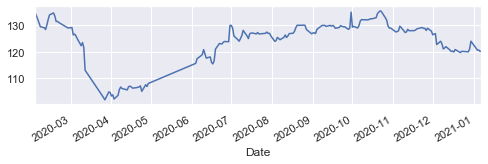

In [48]:
cotaxplg11 = xplg11["Close"].plot(figsize=(8,2), label="xplg11")

In [ ]:
cotaxpci11 = xpci11["Close"].plot(figsize=(8,2), label="xpci11")

In [ ]:
cotaxpsf11 = xpsf11["Close"].plot(figsize=(8,2), label="xpsf11")


In [ ]:
cotabcff11 = bcff11["Close"].plot(figsize=(8,2), label="bcff11")

In [ ]:
cotamxrf11 = mxrf11["Close"].plot(figsize=(8,2), label="mxrf11")

In [ ]:
cotaknri11 = knri11["Close"].plot(figsize=(8,2), label="knri11")

In [ ]:
tord11 = web.get_data_yahoo('TORD11.SA', start='2020-01-01', end='2020-12-31')
cotatord11 = tord11["Close"].plot(figsize=(8,2), title="tord11")

In [30]:
#Ou podemos observar o valor de uma cotação de uma determinada ação dentro também de um intervalo específico e plotar seu valor dentro do intervalo que desejamos. Vou carregar o mesmo intervalo de tempo para todos os stocks abaixo e posteriormente plotar o gráfico com seu valor.
itsa4  = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
klbn4  = web.get_data_yahoo('KLBN4.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
wege3  = web.get_data_yahoo('WEGE3.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
grnd3  = web.get_data_yahoo("GRND3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
mrve3  = web.get_data_yahoo("MRVE3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
bbas3  = web.get_data_yahoo("BBAS3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
itub4  = web.get_data_yahoo("ITUB4.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
egie3  = web.get_data_yahoo("EGIE3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
sqia3  = web.get_data_yahoo("SQIA3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
bpan4  = web.get_data_yahoo("BPAN4.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
tpis3  = web.get_data_yahoo("TPIS3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
tris3  = web.get_data_yahoo("TRIS3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
jhsf3  = web.get_data_yahoo("JHSF3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
bees3  = web.get_data_yahoo('BEES3.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


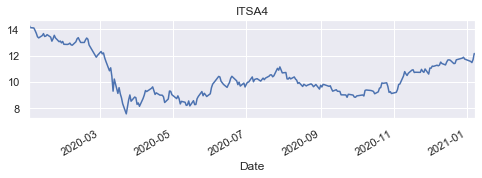

In [31]:
#Podemos verificar cada cota individualmente e isso facilita o trabalho de identificar seu preço ao longo do tempo
itsa4  = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
cotaitsa4 = itsa4["Close"].plot(figsize=(8,2), title="ITSA4")

Date
2020-01-02    1.485149
2020-01-03   -0.422531
2020-01-06   -0.070823
2020-01-07   -1.416429
2020-01-08   -1.720428
2020-01-09   -2.183408
2020-01-10   -1.111108
2020-01-13    0.445430
2020-01-14    1.183431
2020-01-15   -1.247249
dtype: float64

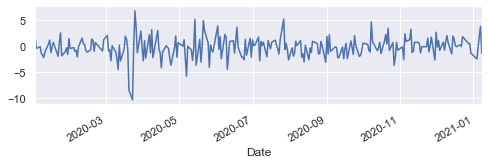

In [32]:
# E podemos verificar suas variações pontuais a partir da função lambda, também dentro de intervalos de tempo específicos onde podemos consultar através do comando head e tail.
pct_itsa4 = (itsa4.Close/itsa4.Open).apply(lambda x:x-1)*100
display(pct_itsa4.head(10))
#Assim como podemos verificar suas oscilações pontualmente em cada dia, podemos verificar a oscilação ao longo dos dias em formato gráfico
pct_itsa4.plot(figsize=(8,2))

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Preço')

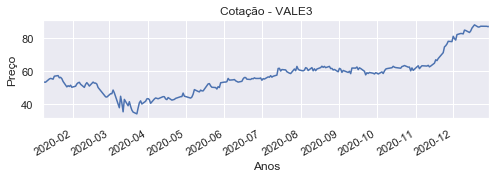

In [39]:
#Exemplo mais eficiente de como observar a oscilação da cota dentro do intervalo de tempo do datetime.
vale3 = web.get_data_yahoo('VALE3.SA', start=datetime.datetime(2020,1,8), end=datetime.datetime(2021,1,1))
cotavale3 = vale3["Close"].plot(figsize=(8,2))
plt.title("Cotação - VALE3")
plt.xlabel("Anos")
plt.ylabel("Preço")

Date
2020-01-08   -0.350558
2020-01-09   -0.837211
2020-01-10   -0.725580
2020-01-13    3.094705
2020-01-14    0.614828
                ...   
2020-12-22    0.092104
2020-12-23    0.959207
2020-12-28   -0.546763
2020-12-29   -1.023078
2020-12-30    0.298193
Length: 243, dtype: float64

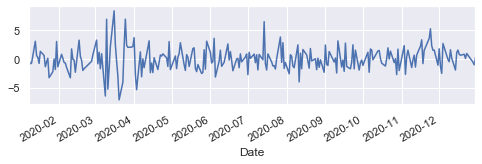

In [41]:
# Variação % da Vale da Rio Doce
pct_vale3 = (vale3.Close/ vale3.Open).apply(lambda x:x-1)*100
display(pct_vale3.head(365))
pct_vale3.plot(figsize=(8,2))

Text(0, 0.5, 'Preço')

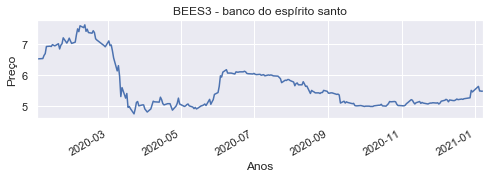

In [48]:

cotabees3 = bees3["Close"].plot(figsize=(8,2))
plt.title("BEES3 - banco do espírito santo")
plt.xlabel("Anos")
plt.ylabel("Preço")

Date
2020-01-02    3.650794
2020-01-03   -0.153143
2020-01-06    0.153378
2020-01-07   -0.910470
2020-01-08    1.221373
2020-01-09   -0.298062
2020-01-10    3.437967
2020-01-13    0.144505
2020-01-14   -0.288184
2020-01-15   -0.143058
dtype: float64

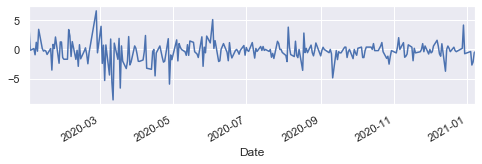

In [50]:
#Variação % da cotação
pct_bees3 = (bees3.Close/bees3.Open).apply(lambda x:x-1)*100
display(pct_bees3.head(10))
pct_bees3.plot(figsize=(8,2))

[*********************100%***********************]  1 of 1 completed


Date
2020-01-02    1.802758
2020-01-03   -0.105543
2020-01-06    0.848355
2020-01-07    0.052495
2020-01-08   -0.628606
2020-01-09   -0.947370
2020-01-10    0.371943
2020-01-13    1.479127
2020-01-14   -0.520835
2020-01-15   -1.263157
dtype: float64

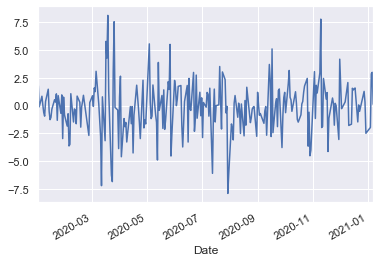

In [52]:
abev3  = web.get_data_yahoo('ABEV3.SA', start=datetime.datetime(2020,1,1), end='2021-01-08')
pct_abev3 = (abev3.Close / abev3.Open).apply(lambda x:x-1)*100
display(pct_abev3.head(10))
pct_abev3.plot()

In [ ]:
# Agora preciso fazer o mesmo para todas as outras empresas para poder verificar suas oscilações pontuais.

In [ ]:
#Ativo Total - Total Assets
#Ativo Circulante - Current Assets
#Ativo Não Circulante - Non-current Assets
#Passivo Total - Total Liabilities
#Passivo Circulante - Current Liabilities
#Passivo Não Circulante - Non-current Liabilities
#Patrimônio Líquido - Net Worth


In [56]:
#Agora vamos começar a usar a biblioteca fundamentos para puxar outras informações relevantes sobre uma empresa
ftsitub4 = fts.get_fundamentos('ITUB4')
# E daí usamos o print para exibir. 
print(ftsitub4)



                       Caixa                                    Dividendos  \
ITUB4 Aplicações Financeiras Dinheiro em Caixa Disponibilidades         DY   
Data                                                                         
2008                  171572               155           171727        NaN   
2009                 6948040               515          6948555        NaN   
2010                  192959              1940           194899     4.4921   
2011                26302382              7833         26310215     1.9960   
2012                 1009894             15883          1025777     1.7383   
2013                  470688            171746           642434     1.7803   
2014                 3060088            114898          3174986     1.5586   
2015                 9978893            155156         10134049     1.1640   
2016                 3687924            797340          4485264     3.8133   
2017                 3590114            625811          4215925 

In [53]:
#Todos os fundamentos do primeiro trimestre de 2020
ftsitub41t20 = fts.get_fundamentos('ITUB4', year=2020, quarter=1)
#Todos os fundamentos dos terceiros trimestres ou de qualquer semestre específico, basta mudar o valor 3 por outro.
ftsitub43t = fts.get_fundamentos('ITUB4', quarter=3)


In [ ]:
#Fundamentos das empresas em carteira
#Todos os fundamentos históricos, anualmente
#O comando fts.get_fundamentos serve para puxar o fundamento da empresa.
ftsbees3 = fts.get_fundamentos('BEES3')
ftsabev3 = fts.get_fundamentos('ABEV3')
ftsklbn4 = fts.get_fundamentos('KLBN4')
ftswege3 = fts.get_fundamentos('WEGE3')
ftsjhsf3 = fts.get_fundamentos('JHSF3')
ftstris3 = fts.get_fundamentos('TRIS3')
ftstpis3 = fts.get_fundamentos('TPIS3')
ftsbpan4 = fts.get_fundamentos('BPAN4')
ftsitub4 = fts.get_fundamentos('ITUB4')
ftsrcsl4 = fts.get_fundamentos('RCSL4')
ftsoibr3 = fts.get_fundamentos('OIBR3')
ftsposi3 = fts.get_fundamentos('POSI3')
ftstaee3 = fts.get_fundamentos('TAEE3')
ftsengi4 = fts.get_fundamentos('ENGI4')
ftssula4 = fts.get_fundamentos('SULA4')
ftsslce3 = fts.get_fundamentos('SLCE3')
ftsegie3 = fts.get_fundamentos('EGIE3')
ftsbbas3 = fts.get_fundamentos('BBAS3')
ftsmrve3 = fts.get_fundamentos('MRVE3')
ftsgrnd3 = fts.get_fundamentos('GRND3')
ftsitsa4 = fts.get_fundamentos('ITSA4')
ftsigta3 = fts.get_fundamentos('IGTA3')


#Por alguma razão, o código SQIA não está funcionando, talvez não tenha a informação na base de dados.

In [ ]:
# E daí usamos o print para exibir a que desejarmos
print(ftsitub4)

In [60]:
ftsbees3 = fts.get_fundamentos('BEES3')
print(ftsbees3)

                       Caixa                                    Dividendos  \
BEES3 Aplicações Financeiras Dinheiro em Caixa Disponibilidades         DY   
Data                                                                         
2008                 2850340            175816          3026156        NaN   
2009                 2801415            112286          2913701        NaN   
2010                 3010264            120481          3130745     0.0404   
2011                 3412810            169231          3582041     0.0385   
2012                 5030442            181066          5211508     0.0355   
2013                 3429025            234707          3663732     0.0279   
2014                 3801616            168322          3969938     0.0288   
2015                 6373298            253608          6626906    -0.0267   
2016                13059861            212374         13272235     0.0212   
2017                 8112087            150168          8262255 

In [64]:
#Baixa todos os balanços anuais da empresa
balance1 = fts.get_balanco('ITUB4')
print(balance1)

DataNotFound: Couldn't find any data for ITUB4

[*********************100%***********************]  1 of 1 completed


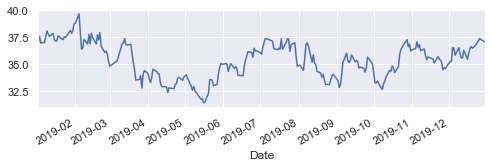

In [65]:
itub4  = web.get_data_yahoo("ITUB4.SA", start='2019-01-01', end='2019-12-31')
cotaitub4 = itub4["Close"].plot(figsize=(8,2))

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([3.6390000e-01, 2.0092750e+09, 4.0185500e+09, 6.0278250e+09,
        8.0371000e+09, 1.0046375e+10, 1.2055650e+10, 1.4064925e+10,
        1.6074200e+10, 1.8083475e+10, 2.0092750e+10]),
 <a list of 13 Lists of Patches objects>)

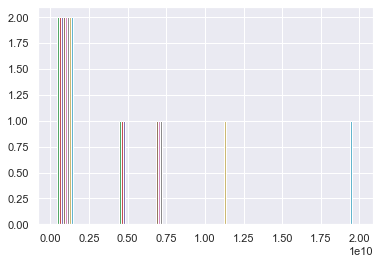

In [69]:
#Dívidendos pagos
ftsitub4['Dividendos']
plt.hist(ftsitub4['Dividendos'])

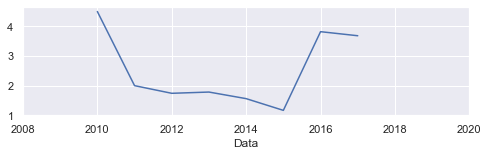

In [70]:
#Escala do gráfico está errada se plotar todas as variáveis juntas
# Por isso plotamos cada coluna separadamente, DYpago está em reais, Payout como todos apresentam um valor 0 < x < 1 assumo que seja uma porcentagem não convertida. Agora, a exponencial no Dividendos e JCP não faz sentido. 
ftsitub4['Dividendos','DY'].plot(figsize=(8,2))

In [78]:
print(ftsbees3)

                       Caixa                                    Dividendos  \
BEES3 Aplicações Financeiras Dinheiro em Caixa Disponibilidades         DY   
Data                                                                         
2008                 2850340            175816          3026156        NaN   
2009                 2801415            112286          2913701        NaN   
2010                 3010264            120481          3130745     0.0404   
2011                 3412810            169231          3582041     0.0385   
2012                 5030442            181066          5211508     0.0355   
2013                 3429025            234707          3663732     0.0279   
2014                 3801616            168322          3969938     0.0288   
2015                 6373298            253608          6626906    -0.0267   
2016                13059861            212374         13272235     0.0212   
2017                 8112087            150168          8262255 

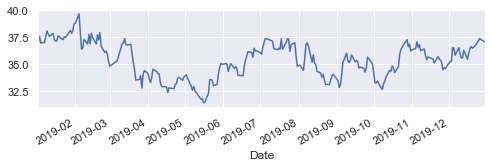

In [82]:
cotaitub4 = itub4["Close"].plot(figsize=(8,2), label="ITUB4")

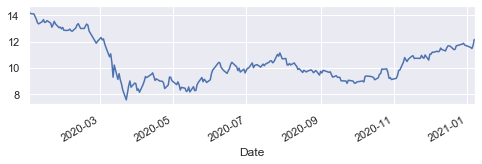

In [81]:
cotaitsa4 = itsa4["Close"].plot(figsize=(8,2), label="ITSA4")